In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#import the dataset
path='//content/drive/MyDrive/DataSets'
df=pd.read_csv(path+'/oil_pipeline_accidents.csv',sep=",",encoding='latin-1')
df.tail()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
2790,20170015,22020,2016,12/27/2016 8:40 AM,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,TINA,CARROLL,MO,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.25,NaN,0.25,0.0,NO,NO,YES,12/27/2016 8:54,12/27/2016 16:11,0.0,0.0,15.0,0.0,0.0,61000.0,0.0,61015
2791,20170028,22046,2016,12/28/2016 4:20 PM,4906,EXXONMOBIL PIPELINE CO,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,"98.7% ETHANE, .97% METHANE, .36% PROPANE",NaN,WEST BATON ROUGE,LA,30.332597,-91.274491,ALL OTHER CAUSES,UNKNOWN,580.00,0.0,0.00,580.0,NO,NO,YES,12/28/2016 16:20,NaN,0.0,0.0,5400.0,0.0,0.0,0.0,100000.0,105400
2792,20170027,22045,2016,12/29/2016 6:40 AM,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,NaN,NaN,CUSHING,PAYNE,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,1.00,NaN,1.00,0.0,NO,NO,NO,NaN,NaN,0.0,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050
2793,20170024,22032,2017,01/03/2017 10:00,32147,MARATHON PIPE LINE LLC,MIDLAND STATION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER...,NaN,INDUSTRY,BEAVER COUNTY,PA,40.631074,-80.440463,ALL OTHER CAUSES,UNKNOWN,0.20,NaN,0.20,0.0,NO,NO,NO,NaN,NaN,0.0,11852.0,11.0,0.0,29565.0,0.0,0.0,41428
2794,20170025,22040,2017,01/09/2017 07:40,30829,ENTERPRISE CRUDE PIPELINE LLC,MARSHALL STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,GONZALES,GONZALES,TX,29.305410,-97.400301,INCORRECT OPERATION,INCORRECT INSTALLATION,4.00,NaN,4.00,0.0,NO,NO,NO,NaN,NaN,0.0,45600.0,200.0,0.0,0.0,0.0,0.0,45800


#Cleaning Process

In [3]:
#Let's create a new df with the columns we are interested in
#df.columns.tolist()
data=df[['Report Number','Accident Year',
 'Accident Date/Time',
  'Pipeline Type',
 'Liquid Type',
  'Accident City',
  'Accident Latitude',
 'Accident Longitude',
 'Cause Category',
  'Unintentional Release (Barrels)',
  'Environmental Remediation Costs',
  'All Costs']].copy()

In [ ]:
#Let's check which columns have missing values
data.isna().sum()

Report Number                        0
Accident Year                        0
Accident Date/Time                   0
Pipeline Type                       18
Liquid Type                          0
Accident City                      315
Accident Latitude                    0
Accident Longitude                   0
Cause Category                       0
Unintentional Release (Barrels)      0
Environmental Remediation Costs      8
All Costs                            0
dtype: int64

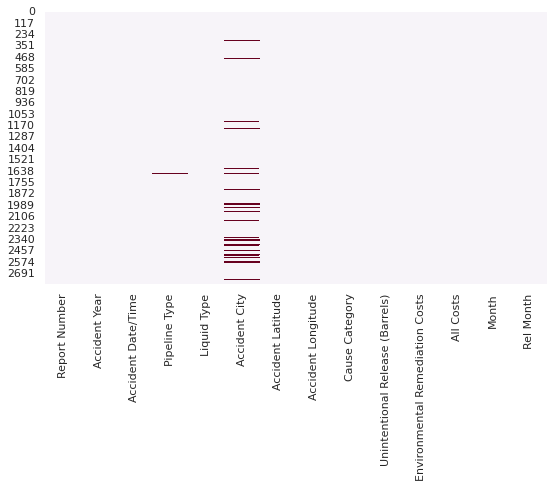

In [86]:
#We also can check missing values with a graph
fig, ax=plt.subplots(figsize=(9,5))
sns.heatmap(data.isnull(),cbar=False,cmap='PuRd')
plt.show()

In [ ]:
#'Accident city' and 'Pipeline Type' Let's fill the missing information in the dataset with "Not-defined"
data[['Pipeline Type','Accident City']]=data[['Pipeline Type','Accident City']].fillna('not-defined')

#'Environmental Cost' has 8 missing values, let's fill them with 0
data['Environmental Remediation Costs']=data['Environmental Remediation Costs'].fillna(0)

In [ ]:
#Let's take a look at the dataset structor and type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Report Number                    2795 non-null   int64  
 1   Accident Year                    2795 non-null   int64  
 2   Accident Date/Time               2795 non-null   object 
 3   Pipeline Type                    2795 non-null   object 
 4   Liquid Type                      2795 non-null   object 
 5   Accident City                    2795 non-null   object 
 6   Accident Latitude                2795 non-null   float64
 7   Accident Longitude               2795 non-null   float64
 8   Cause Category                   2795 non-null   object 
 9   Unintentional Release (Barrels)  2795 non-null   float64
 10  Environmental Remediation Costs  2795 non-null   float64
 11  All Costs                        2795 non-null   int64  
dtypes: float64(4), int64

In [4]:
#let's convert the column 'Accident Date/Time' to date format
data['Accident Date/Time']=pd.to_datetime(data['Accident Date/Time'])

In [5]:
#the df has only to records from 2017, so we have to drop this two rows to continue with the analysis
data.drop([2793,2794],axis=0, inplace=True)

#EDA process
The dataset is ready for EDA. Let's explore the dataset and get answers to the next questions:

1.   The accidents increase year by year?
2.   What accident cause is the most common?
3.   What liquid spills more often?
4.  What accident cause is the most expensive?
5.  What liquid spill has the highest environmental remediation cost?
6. Theres is any correlation between factors like pipeline type, Accident cause and the cost?

___







##Question 1
The accidents increase year by year?


In [42]:
NumAccidents=data[['Accident Year', 'Report Number']].groupby(['Accident Year'], as_index=False).nunique().sort_values(by='Accident Year', ascending=True)
NumAccidents

,Accident Year,Report Number
0,2010,350
1,2011,345
2,2012,366
3,2013,401
4,2014,454
5,2015,462
6,2016,415


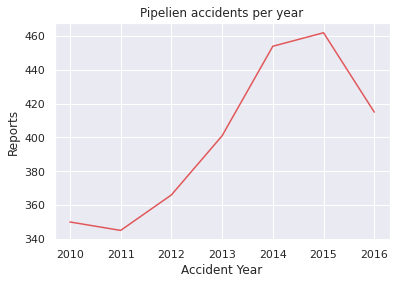

In [43]:
#Let's try a lineplot
sns.lineplot(x='Accident Year', y='Report Number', data=NumAccidents, color='#e15759')
plt.ylabel("Reports")
plt.title("Pipelien accidents per year")
plt.show()

##Question 2
What accident cause is the most common?

In [ ]:
data[['Cause Category', 'Report Number']].groupby(['Cause Category'], as_index=False).nunique().sort_values(by='Report Number', ascending=False)

,Cause Category,Report Number
4,MATERIAL/WELD/EQUIP FAILURE,1435
1,CORROSION,592
3,INCORRECT OPERATION,378
0,ALL OTHER CAUSES,118
5,NATURAL FORCE DAMAGE,118
2,EXCAVATION DAMAGE,97
6,OTHER OUTSIDE FORCE DAMAGE,57


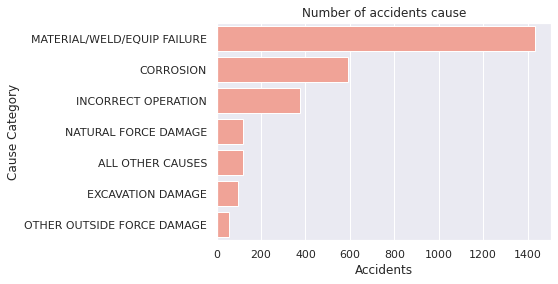

In [46]:
sns.countplot(y='Cause Category', data=data, color='#ff9888', order = data['Cause Category'].value_counts().index)
plt.xlabel("Accidents")
plt.title("Number of accidents cause")
plt.xticks(rotation=0)
plt.show()

##Question 3
what liquid spills more often 

In [ ]:
data[['Liquid Type', 'Report Number']].groupby(['Liquid Type'], as_index=False).nunique().sort_values(by='Report Number', ascending=False)

,Liquid Type,Report Number
2,CRUDE OIL,1398
4,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",939
3,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",418
1,CO2 (CARBON DIOXIDE),38
0,BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL B...,2


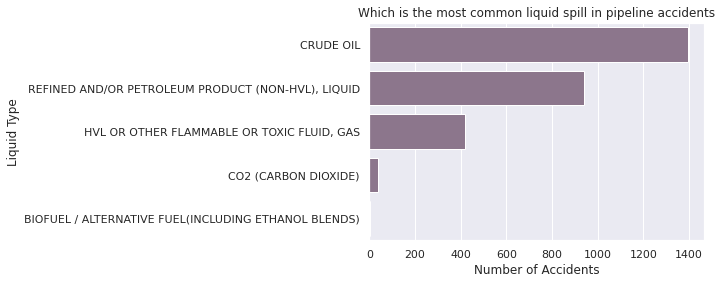

In [47]:
sns.countplot(y='Liquid Type', data=data, order=data['Liquid Type'].value_counts().index, color='#90728f')
plt.xlabel('Number of Accidents')
plt.title("Which is the most common liquid spill in pipeline accidents")
plt.show()

## Outliers

---

In [82]:
#Let's check which accidents are
data.sort_values(by=['All Costs'], ascending=False).head(5)

,Report Number,Accident Year,Accident Date/Time,Pipeline Type,Liquid Type,Accident City,Accident Latitude,Accident Longitude,Cause Category,Unintentional Release (Barrels),Environmental Remediation Costs,All Costs,Month,Rel Month
194,20100181,2010,2010-07-25 17:58:00,UNDERGROUND,CRUDE OIL,MARSHALL,42.243290,-84.972510,MATERIAL/WELD/EQUIP FAILURE,20082.0,635000000.0,840526118,7,7.0
2103,20150224,2015,2015-05-19 10:57:00,UNDERGROUND,CRUDE OIL,GOLETA,34.462434,-120.086714,CORROSION,2934.0,22421933.0,142931884,5,65.0
523,20110262,2011,2011-07-01 22:40:00,UNDERGROUND,CRUDE OIL,LAUREL,45.655486,-108.757240,NATURAL FORCE DAMAGE,1509.0,0.0,135000000,7,19.0
1173,20130151,2013,2013-03-29 14:37:00,UNDERGROUND,CRUDE OIL,MAYFLOWER,34.964060,-92.428590,MATERIAL/WELD/EQUIP FAILURE,3190.0,20100000.0,91300000,3,39.0
2675,20160324,2016,2016-09-09 11:10:00,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",HELENA,33.236374,-86.916634,ALL OTHER CAUSES,7370.0,0.0,66234072,9,81.0


In [6]:
#We need the months in a separate column to do a deeper analysis
data['Month']=data['Accident Date/Time'].dt.month

In [8]:
#Let's make a relative month column
data['Rel Month'] = (data['Accident Year']-2010)*12. + data['Month']


In [12]:
headers = headers = ['Accident Year','All Costs','Rel Month']
by_month = data[headers].groupby(['Rel Month'])



Text(73, 100000000, '$66M\nall other causes\nrefine products')

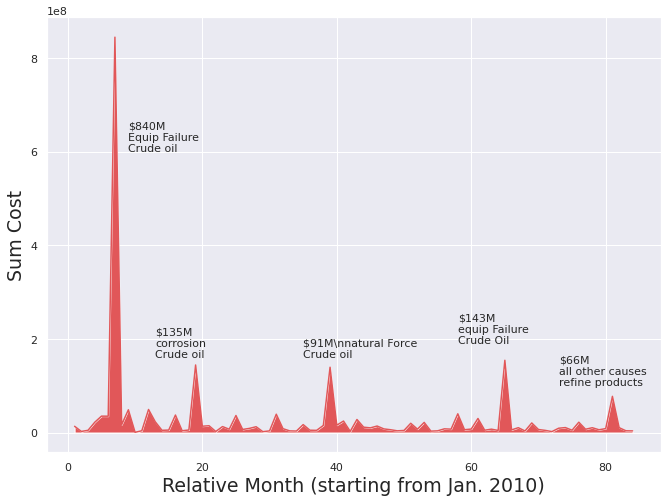

In [83]:
xPt = by_month.sum()['All Costs'].index.values
yAll_sum = by_month.sum()['All Costs'].values

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

plt.plot(xPt, yAll_sum, label="All", color='#e15759')
plt.fill_between(xPt, yAll_sum, 10E0, facecolor='#e15759', alpha=1)
#ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlabel('Relative Month (starting from Jan. 2010)', fontsize=19)
plt.ylabel('Sum Cost', fontsize=19)
ax.text(9,600000000, "$840M\nEquip Failure\nCrude oil",fontsize=11)
ax.text(13,160000000, "$135M\ncorrosion\nCrude oil",fontsize=11)
ax.text(35,160000000, "$91M\\nnatural Force\nCrude oil",fontsize=11)
ax.text(58,190000000, "$143M\nequip Failure\nCrude Oil",fontsize=11)
ax.text(73,100000000, "$66M\nall other causes\nrefine products",fontsize=11)

In [78]:
#For the cost anlysis, we'll use a new df without the outliers
outliers=data.drop([194,2103,523,1173,2675], axis=0)

##Question 4
Which accident cause has the highest cost?

In [91]:
outliers[['Cause Category','All Costs']].groupby(['Cause Category'], as_index=False).sum().sort_values(by=['All Costs'],ascending=False)

,Cause Category,All Costs
4,MATERIAL/WELD/EQUIP FAILURE,311948309
1,CORROSION,252393793
6,OTHER OUTSIDE FORCE DAMAGE,161602026
3,INCORRECT OPERATION,106094654
2,EXCAVATION DAMAGE,93101223
5,NATURAL FORCE DAMAGE,85354295
0,ALL OTHER CAUSES,44549321


In [92]:
#by default, barplot shows the mean of the data. To see this clearly, let's calculate the mean of the costs.
outliers[['Cause Category','All Costs']].groupby(['Cause Category']).agg({'All Costs':'mean'})

,All Costs
Cause Category,
ALL OTHER CAUSES,3.840459e+05
CORROSION,4.270623e+05
EXCAVATION DAMAGE,9.598064e+05
INCORRECT OPERATION,2.814182e+05
MATERIAL/WELD/EQUIP FAILURE,2.176890e+05
NATURAL FORCE DAMAGE,7.295239e+05
OTHER OUTSIDE FORCE DAMAGE,2.835123e+06


Text(0.5, 1.0, 'Avg accident cost per cause')

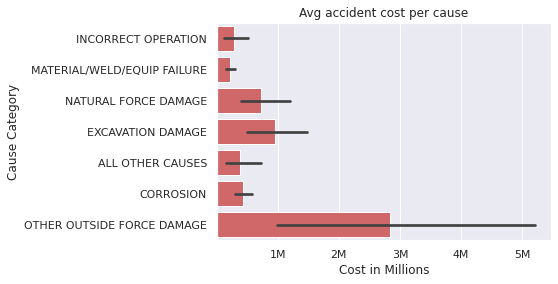

In [93]:
#Here we need to consider the outliers
ax2=sns.barplot(x='All Costs', y='Cause Category', data=outliers, color='#e15759')
ax2.set_xticks([1000000,2000000, 3000000, 4000000, 5000000])
ax2.set_xticklabels(['1M','2M','3M','4M','5M'])
plt.xlabel('Cost in Millions')
plt.title('Avg accident cost per cause')

## Question 5
What liquid spill has the highest environmental remediation cost?

In [94]:
outliers[['Liquid Type','Environmental Remediation Costs']].groupby(['Liquid Type'],as_index=False).mean().sort_values(by='Environmental Remediation Costs',ascending=False)

,Liquid Type,Environmental Remediation Costs
4,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",164863.333690
2,CRUDE OIL,123904.166667
3,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",16955.351090
0,BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL B...,300.000000
1,CO2 (CARBON DIOXIDE),78.947368


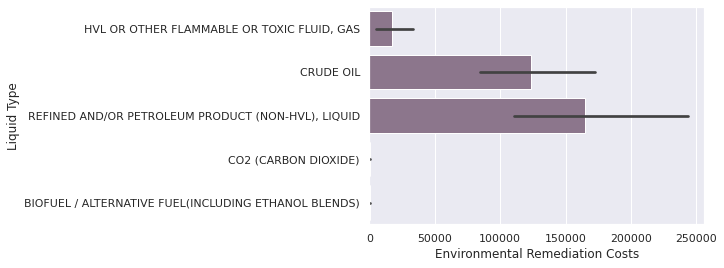

In [80]:
sns.barplot(x='Environmental Remediation Costs', y='Liquid Type', data=outliers, color='#90728f')

##Question 6
Theres is any correlation?

In [88]:
#First we need to convert categorical data into numbers
map_causes={'MATERIAL/WELD/EQUIP FAILURE':1,
'CORROSION':2,
'INCORRECT OPERATION':3,
'ALL OTHER CAUSES':4,
'NATURAL FORCE DAMAGE':5,
'EXCAVATION DAMAGE':6,
'OTHER OUTSIDE FORCE DAMAGE':7}
data['CauseConv']=data['Cause Category'].map(map_causes)

map_pipeline={'ABOVEGROUND':1, 
'UNDERGROUND':2, 
'TANK':3, 
'not-defined':5,
'TRANSITION AREA':4}
data['PipelineConv']=data['Pipeline Type'].map(map_pipeline)

In [89]:
map_liquid={'CRUDE OIL':1,
'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID':2,
'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS':3,	
'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)':4,
'CO2 (CARBON DIOXIDE)':5}
data['LiquidConv']=data['Liquid Type'].map(map_liquid)

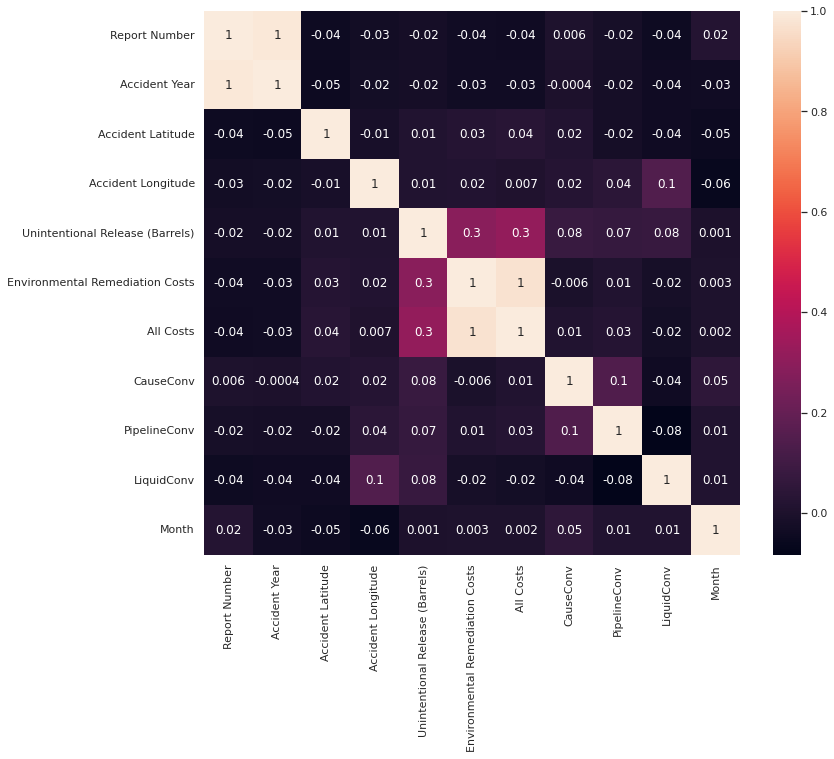

In [ ]:
#Now let's check the correlations
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data.corr(),annot=True,fmt='.1g')

##Extra: EDA with other columns and jointplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


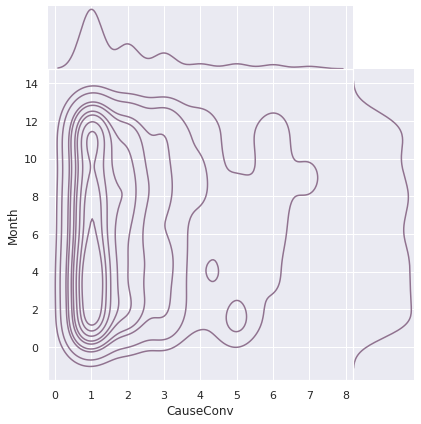

In [90]:
#month and causes
sns.jointplot('CauseConv','Month',data,kind='kde',space=0,color='#90728f')

In [ ]:
data.to_csv('/Pipeline_Accidents.csv', index=False)
!cp /Pipeline_Accidents.csv "drive/My Drive/"